# Homework

---

### Q1

Complete the code below showing the sequential posterior distributions created as each observation is actualized.

\begin{align*}
\text{Likelihood} && p(x|\theta,n) &={} \texttt{Binomial}\\\\
\text{Prior} && \underset{\texttt{Uniform}}{\overset{\texttt{Discrete}}{p(\theta)}} &={} \Bigg\{ \begin{array}{cl} \frac{1}{101} & \text{for }\theta=\frac{i}{100}\text{ for } i = 0,1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
\text{Posterior} && p(\theta|x,n) &={} \overset{\text{Bayes Theorem}}{\frac{p(x|\theta)p(\theta)}{p(x)}} = \; \texttt{What?}\\
&&& \quad\quad\quad\quad\quad\; = \; \texttt{What distribution?}\\
&&& \quad\quad\quad\quad\quad\quad\;\;\, \texttt{With what parameterization?}\\
\end{align*}

### _The posterior is always proportional to the joint_

$$\large p(\theta|x) = (1/c)\times p(\theta,x) \propto{} p(\theta,x)$$

**_and the posterior is always a proper distribution if the prior is_**

### Q2

Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors

   $$p(\theta_j|x_j^{(t)},n_j^{(t)}) \propto \theta^{x_j^{(t)}+\alpha_j-1}(1-\theta_j^{(t)})^{n_j^{(t)}-x_j^{(t)}+\beta_j-1}  \Rightarrow \; \text{What distribution?}$$
   
2. Set $n_j^{(0)}=x_j^{(0)}=0$ and iterate time using `for t in range(m):`

3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on $\theta_2^{true}$ is $\Pr(\theta_1 < \theta_2 | n_1^{(t)},x_1^{(t)},n_2^{(t)},x_2^{(t)})$

4. Update the $n_j^{(t+1)}$ and $x_j^{(t+1)}$ as appropriate

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

This procedure is known as the **Bayesian multi-armed bandit** and is considered a very useful tool for effectively balancing the **exploration-exploitation** tradeoff in the so-called **AB testing** context. You can always search for more information about something to help understanding better.

*Provide some visualizations demonstrating the learning process that the algorithm undergoes.*

### Q3

Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:
1. Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above
2. Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

*Discuss which of the two approaches you think is most appropriate and describe an actual real world **AB testing** context where you could deploy this **Bayesian multi-armed bandit** to effectively balancing the **exploration-exploitation** tradeoff in that setting.*

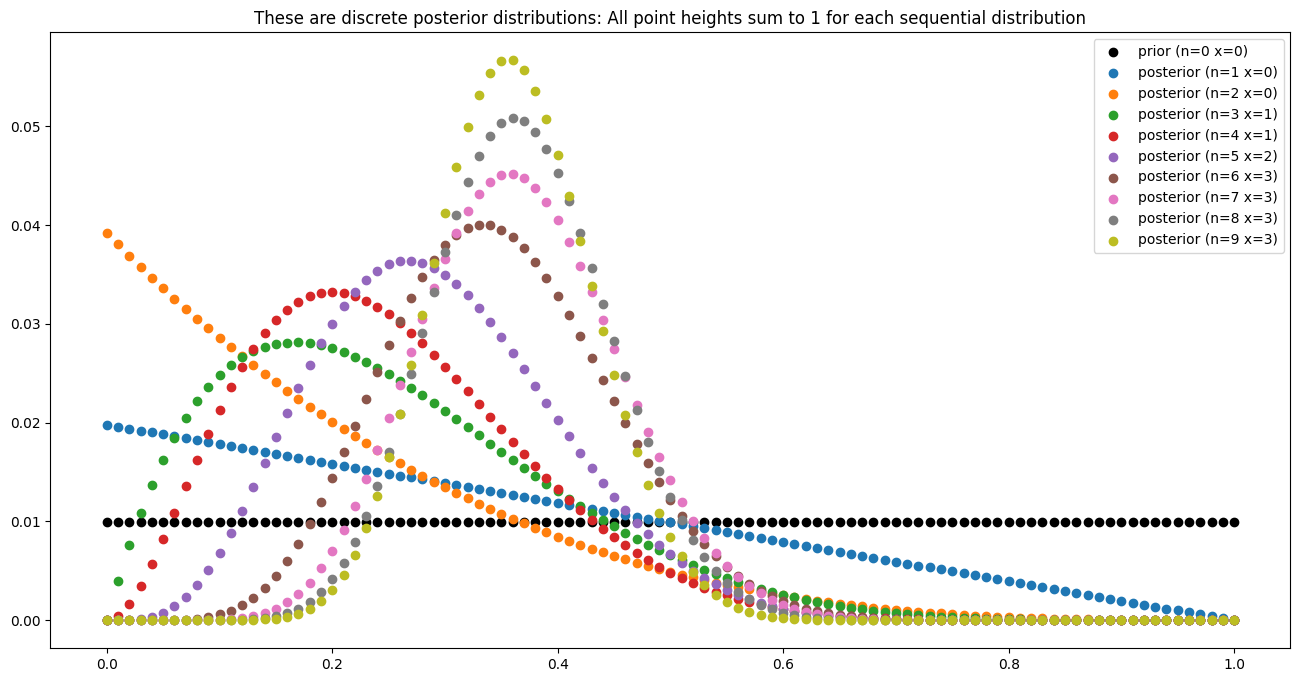

In [2]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101)
prior = np.ones(101)/101

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0

plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")

for observation in observations:
    n += 1
    x += observation

    likelihood = parameter_domain ** x * (1 - parameter_domain) ** (n - x)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    prior = posterior

    plt.scatter(parameter_domain, posterior, label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

### Q2.1 What distribution is the posterior?

The posterior is a Beta distribution, with the following parameters:

$\alpha' = x_j^{(t)}+\alpha_j$

$\beta'=n_j^{(t)}-x_j^{(t)}+\beta_j$

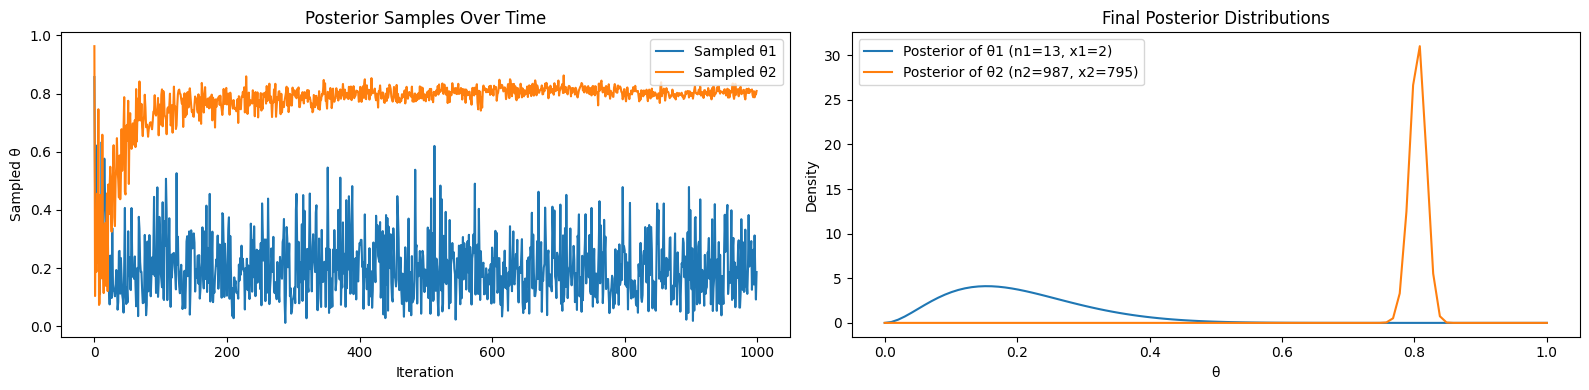

In [8]:
# Q2.2 - 2.5

n1, x1 = 0, 0
n2, x2 = 0, 0
m = 1000
alpha = 1
beta = 1

theta1_true = 0.2
theta2_true = 0.8

theta1_samples = []
theta2_samples = []
chosen_theta = []
coinflips = []

for t in range(m):
  theta1 = np.random.beta(x1+alpha,n1-x1+beta)
  theta2 = np.random.beta(x2+alpha,n2-x2+beta)

  theta1_samples.append(theta1)
  theta2_samples.append(theta2)

  if theta1 > theta2:
    chosen_theta.append(1)
    coinflip = np.random.binomial(1,theta1_true)
    n1 += 1
    x1 += coinflip
  else:
    chosen_theta.append(2)
    coinflip = np.random.binomial(1,theta2_true)
    n2 += 1
    x2 += np.random.binomial(1,theta2_true)

  coinflips.append(coinflip)

plt.figure(figsize=(16,4))

# Posterior Updates
plt.subplot(1, 2, 1)
plt.plot(theta1_samples, label="Sampled θ1")
plt.plot(theta2_samples, label="Sampled θ2")
plt.title("Posterior Samples Over Time")
plt.xlabel("Iteration")
plt.ylabel("Sampled θ")
plt.legend()

# Posterior Distributions
theta_range = np.linspace(0, 1, 100)
posterior_1 = stats.beta.pdf(theta_range, x1 + 1, n1 - x1 + 1)
posterior_2 = stats.beta.pdf(theta_range, x2 + 1, n2 - x2 + 1)

plt.subplot(1, 2, 2)
plt.plot(theta_range, posterior_1, label=f"Posterior of θ1 (n1={n1}, x1={x1})")
plt.plot(theta_range, posterior_2, label=f"Posterior of θ2 (n2={n2}, x2={x2})")
plt.title("Final Posterior Distributions")
plt.xlabel("θ")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

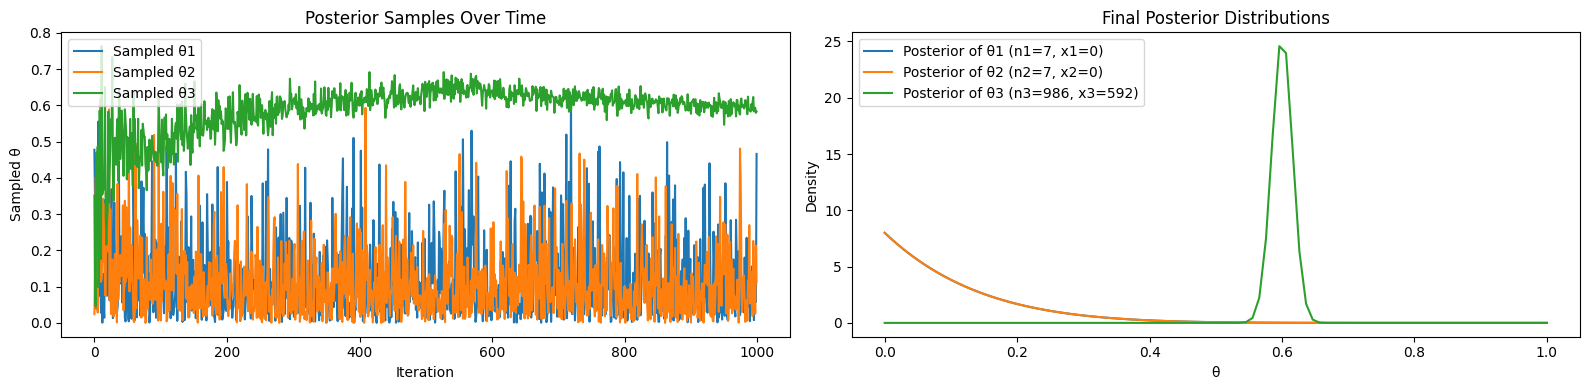

<ipython-input-13-eebef8f8fb19>:132: RuntimeWarning: invalid value encountered in divide
  posterior_1 = np.array(posterior_1) / np.sum(posterior_1)
<ipython-input-13-eebef8f8fb19>:134: RuntimeWarning: invalid value encountered in divide
  posterior_3 = np.array(posterior_3) / np.sum(posterior_3)


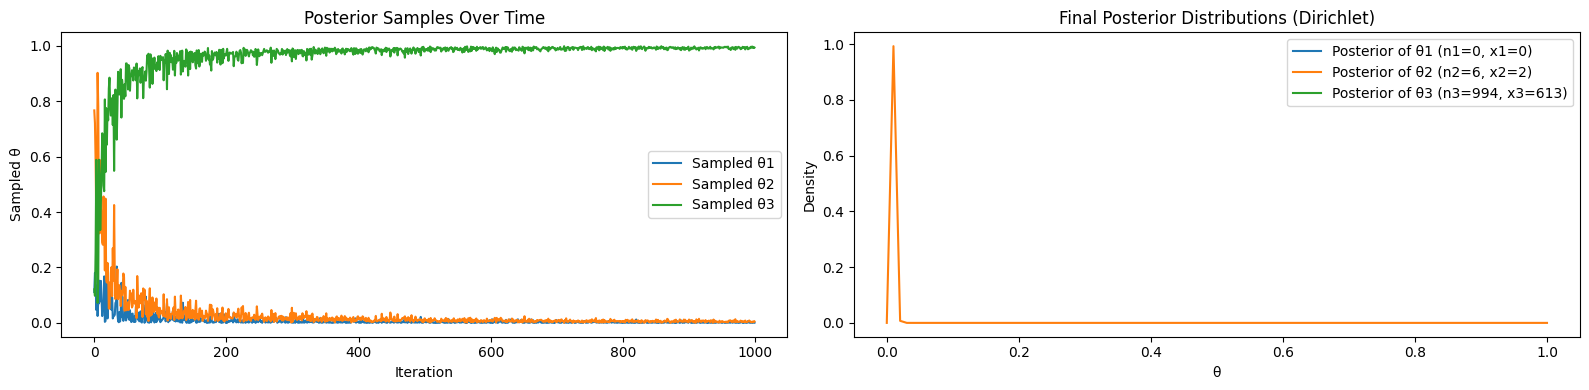

In [13]:
# Q3

# Analysis 1
n1, x1 = 0, 0
n2, x2 = 0, 0
n3, x3 = 0, 0

m = 1000
alpha = 1
beta = 1

theta1_true = 0.1
theta2_true = 0.3
theta3_true = 0.6


theta1_samples = []
theta2_samples = []
theta3_samples = []
chosen_theta = []
coinflips = []


for t in range(m):
  theta1 = np.random.beta(x1+alpha,n1-x1+beta)
  theta2 = np.random.beta(x2+alpha,n2-x2+beta)
  theta3 = np.random.beta(x3+alpha,n3-x3+beta)

  theta1_samples.append(theta1)
  theta2_samples.append(theta2)
  theta3_samples.append(theta3)

  if (theta1 > theta2) and (theta1 > theta3):
    chosen_theta.append(1)
    coinflip = np.random.binomial(1, theta1_true)
    n1 += 1
    x1 += coinflip

  if (theta2 > theta1) and (theta2 > theta3):
    chosen_theta.append(2)
    coinflip = np.random.binomial(1, theta2_true)
    n2 += 1
    x2 += coinflip

  if (theta3 > theta1) and (theta3 > theta2):
    chosen_theta.append(3)
    coinflip = np.random.binomial(1, theta3_true)
    n3 += 1
    x3 += coinflip

  coinflips.append(coinflip)

plt.figure(figsize=(16,4))

# Posterior Updates
plt.subplot(1, 2, 1)
plt.plot(theta1_samples, label="Sampled θ1")
plt.plot(theta2_samples, label="Sampled θ2")
plt.plot(theta3_samples, label="Sampled θ3")
plt.title("Posterior Samples Over Time")
plt.xlabel("Iteration")
plt.ylabel("Sampled θ")
plt.legend()

# Posterior Distributions
theta_range = np.linspace(0, 1, 100)
posterior_1 = stats.beta.pdf(theta_range, x1 + 1, n1 - x1 + 1)
posterior_2 = stats.beta.pdf(theta_range, x2 + 1, n2 - x2 + 1)
posterior_3 = stats.beta.pdf(theta_range, x3 + 1, n3 - x3 + 1)

plt.subplot(1, 2, 2)
plt.plot(theta_range, posterior_1, label=f"Posterior of θ1 (n1={n1}, x1={x1})")
plt.plot(theta_range, posterior_2, label=f"Posterior of θ2 (n2={n2}, x2={x2})")
plt.plot(theta_range, posterior_3, label=f"Posterior of θ3 (n3={n3}, x3={x3})")
plt.title("Final Posterior Distributions")
plt.xlabel("θ")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

# Analysis 2
import numpy as np
from scipy.stats import dirichlet
import matplotlib.pyplot as plt

theta_true = [0.1, 0.3, 0.6]
m = 1000  # Number of iterations
alpha_prior = np.ones(len(theta_true))

n = np.zeros(len(theta_true))  # Number of trials per arm
x = np.zeros(len(theta_true))  # Number of successes per arm

theta_samples = []
chosen_theta = []
coinflips = []

for t in range(m):
    theta_sample = np.random.dirichlet(alpha_prior + x)
    theta_samples.append(theta_sample)

    max_theta = np.argmax(theta_sample)
    chosen_theta.append(max_theta + 1)

    coinflip = np.random.binomial(1, theta_true[max_theta])
    n[max_theta] += 1
    x[max_theta] += coinflip

    coinflips.append(coinflip)

theta_samples = np.array(theta_samples)
plt.figure(figsize=(16, 4))

# Posterior Updates
plt.subplot(1, 2, 1)
plt.plot(theta_samples[:, 0], label="Sampled θ1")
plt.plot(theta_samples[:, 1], label="Sampled θ2")
plt.plot(theta_samples[:, 2], label="Sampled θ3")
plt.title("Posterior Samples Over Time")
plt.xlabel("Iteration")
plt.ylabel("Sampled θ")
plt.legend()

# Posterior Distributions
theta_range = np.linspace(0, 1, 100)

posterior_1 = [dirichlet.pdf([theta, 1 - theta, 0], alpha_prior + x) for theta in theta_range]
posterior_2 = [dirichlet.pdf([0, theta, 1 - theta], alpha_prior + x) for theta in theta_range]
posterior_3 = [dirichlet.pdf([1 - theta, 0, theta], alpha_prior + x) for theta in theta_range]

posterior_1 = np.array(posterior_1) / np.sum(posterior_1)
posterior_2 = np.array(posterior_2) / np.sum(posterior_2)
posterior_3 = np.array(posterior_3) / np.sum(posterior_3)

plt.subplot(1, 2, 2)
plt.plot(theta_range, posterior_1, label=f"Posterior of θ1 (n1={n[0]:.0f}, x1={x[0]:.0f})")
plt.plot(theta_range, posterior_2, label=f"Posterior of θ2 (n2={n[1]:.0f}, x2={x[1]:.0f})")
plt.plot(theta_range, posterior_3, label=f"Posterior of θ3 (n3={n[2]:.0f}, x3={x[2]:.0f})")

plt.title("Final Posterior Distributions (Dirichlet)")
plt.xlabel("θ")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()



### Discussion

From the visualizations, it can be seen that the second method that utilizes the dirichlet-multinomial model stabilizes much more quickly than the first method that utilizes the beta-binomial model. From the left-hand-side plots, there is much more instability in the estimates of the theta values from the first method. Therefore, it can be concluded that the second method is more appropriate, as it is able to stabilize and converge to a result much quicker than the first method.

One real-world example that comes to mind for the AB testing context relates to online marketing/advertising strategies for a company. When considering online advertisement, there are various strategies and types of ads that can be used to appeal to different consumers -- in this case, consider static image advertisements, video advertisements, and interactive advertisements. The Bayesian multi-armed bandit could be deployed in this context to effectively balance the exploration-exploitation trade-off by optimizing which ad type to show to which specific consumers, allowing for more sales and more user engagement. These different advertisement strategies are likely to be correlated/have many overlapping characteristics and features, which again supports the use of the Bayesian multi-armed bandit.